# Scratch Detection and Classification

**Scratch Detection and Classification using Mask R-CNN and ResNet50**

This project aims to detect and classify scratches in images as "Good" or "Bad" using advanced deep learning techniques. The approach includes two primary tasks:

1. **Classifying images** based on the presence of scratches.
2. **Localizing scratches** using bounding boxes and masks.

The methodology leverages **ResNet50** for classification and **Mask R-CNN** for precise detection and localization of scratches.

---

## **Project Overview**

The objective is to analyze images to determine if they contain scratches and, if so, to identify and localize those scratches. This is accomplished through two main phases:

1. **Image Classification**: Utilizing ResNet50, images are categorized as:
   - **Good**: No scratches detected.
   - **Bad**: Scratches present.
   
2. **Scratch Localization**: Using Mask R-CNN, scratches in "Bad" images are identified by drawing bounding boxes or generating masks over the affected regions.

---

## **Model Selection and Training**

### **ResNet50 for Image Classification**

ResNet50 was chosen for its robustness in image classification tasks, particularly for identifying features like scratches. The model benefits from:

- **Pretraining on ImageNet**, which improves generalization even with smaller datasets.
- **Fine-tuning** for binary classification: distinguishing "Good" images from "Bad" images.

### **Mask R-CNN for Scratch Localization**

Mask R-CNN is deployed to pinpoint and highlight scratches in "Bad" images. Its key attributes include:

- High precision in instance segmentation.
- Ability to generate bounding boxes and masks for scratched regions.

---

## **Detection Workflow**

### **Step 1: Thresholding the Mask**

- Masks are thresholded to identify scratched regions.
- A threshold value is set to determine whether an image qualifies as "Bad" based on the total scratch area.

### **Step 2: Contour Detection**

- Contours of the scratches are identified and analyzed.
- The total scratch area is computed by summing the contour areas.

### **Step 3: Drawing Bounding Boxes**

- Each detected scratch region is highlighted by drawing bounding boxes on the original image.

---

## **Evaluation and Metrics**

### **Classification Metrics**

Performance is assessed using the following:

- **Precision, Recall, and F1-Score** for both "Good" and "Bad" classes.
- **ROC Curve and AUC** to measure overall classification performance.

### **Macro and Weighted Averages**

- **Macro Average**: Performance averaged across all classes.
- **Weighted Average**: Takes class sample sizes into account for weighted performance evaluation.

---

## **Results**

The classification and localization models demonstrated strong performance:

- **Precision (Bad)**: 0.96  
- **Recall (Bad)**: 0.78  
- **F1-Score (Bad)**: 0.86  
- **Overall Accuracy**: 95%

These results highlight the effectiveness of the combined ResNet50 and Mask R-CNN approach in detecting and classifying scratches in images.


# Scratch Detection and Classification

# Import Libraries

In [8]:
# Install necessary libraries
!pip install tensorflow tqdm matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.6 MB/s eta 0:00:0000:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.18.0 which is incompatible.
tensorflow-text 2.17.0 requires tensorflow<2.18,>=2.17.0, but you have tensorflow 2.18.0 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [9]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tqdm import tqdm

# Step 2: Explore the Dataset

In [10]:
# Define the dataset path
good_folder = '/kaggle/input/anomaly-detection/anomaly_detection_test_data/good'
bad_folder = '/kaggle/input/anomaly-detection/anomaly_detection_test_data/bad'
mask_folder = '/kaggle/input/anomaly-detection/anomaly_detection_test_data/masks'

# Check the number of images in each folder
good_images = os.listdir(good_folder)
bad_images = os.listdir(bad_folder)
mask_images = os.listdir(mask_folder)

print(f'Good images: {len(good_images)}')
print(f'Bad images: {len(bad_images)}')
print(f'Mask images: {len(mask_images)}')

Good images: 4157
Bad images: 1023
Mask images: 1023


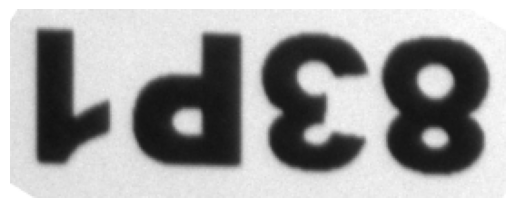

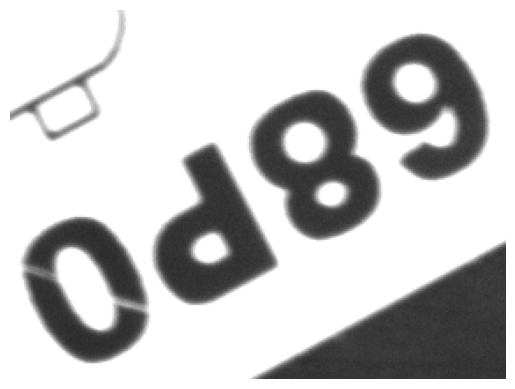

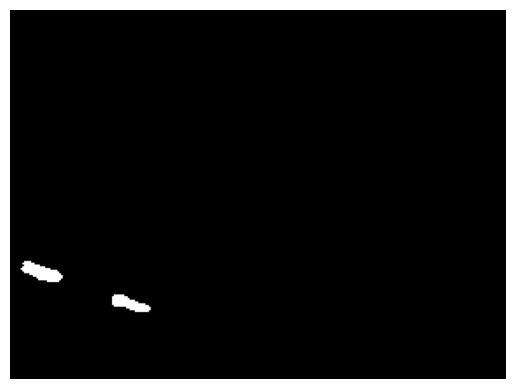

In [11]:
# Display a few sample images from each folder
def display_image(image_path):
    img = load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Display sample images from the Good, Bad, and Mask folders
display_image(os.path.join(good_folder, good_images[0]))
display_image(os.path.join(bad_folder, bad_images[0]))
display_image(os.path.join(mask_folder, mask_images[0]))

# Step 3: Image Resizing and Preprocessing

In [12]:
# Step 1: Preprocessing the Images
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np

# Define the dataset paths
good_folder = '/kaggle/input/anomaly-detection/anomaly_detection_test_data/good'
bad_folder = '/kaggle/input/anomaly-detection/anomaly_detection_test_data/bad'

# Function to preprocess an image
def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)  # Resize image
    img_array = img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to preprocess all images in a folder
def preprocess_all_images(folder_path):
    images = os.listdir(folder_path)  # List all image filenames in the folder
    preprocessed_images = []  # List to store preprocessed images
    
    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        preprocessed_img = preprocess_image(img_path)
        preprocessed_images.append(preprocessed_img)
    
    return np.array(preprocessed_images)

# Preprocess all Good and Bad images
preprocessed_good_images = preprocess_all_images(good_folder)
preprocessed_bad_images = preprocess_all_images(bad_folder)

# Remove the extra dimension (from shape: (4157, 1, 224, 224, 3) to (4157, 224, 224, 3))
preprocessed_good_images = np.squeeze(preprocessed_good_images)
preprocessed_bad_images = np.squeeze(preprocessed_bad_images)

# Check the shapes of the preprocessed image arrays
print(f"Shape of preprocessed Good images: {preprocessed_good_images.shape}")
print(f"Shape of preprocessed Bad images: {preprocessed_bad_images.shape}")

Shape of preprocessed Good images: (4157, 224, 224, 3)
Shape of preprocessed Bad images: (1023, 224, 224, 3)


In [13]:

# Step 2: Create Labels for Good and Bad images
good_labels = np.zeros(len(preprocessed_good_images))  # Label 0 for Good images
bad_labels = np.ones(len(preprocessed_bad_images))    # Label 1 for Bad images

# Check the labels
print(f"Good labels: {good_labels[:5]}")  # Show first 5 labels
print(f"Bad labels: {bad_labels[:5]}")    # Show first 5 labels


Good labels: [0. 0. 0. 0. 0.]
Bad labels: [1. 1. 1. 1. 1.]


# Step 4: Split the Dataset

In [14]:
# Step 3: Split the Good and Bad images independently
from sklearn.model_selection import train_test_split

# Split the good and bad images into train, validation, and test sets
X_train_good, X_temp_good, y_train_good, y_temp_good = train_test_split(preprocessed_good_images, good_labels, test_size=0.2, random_state=42)
X_train_bad, X_temp_bad, y_train_bad, y_temp_bad = train_test_split(preprocessed_bad_images, bad_labels, test_size=0.2, random_state=42)

In [15]:
# Step 4: Combine the train, validation, and test sets for good and bad images
X_train = np.concatenate([X_train_good, X_train_bad], axis=0)
y_train = np.concatenate([y_train_good, y_train_bad], axis=0)

# For the validation and test sets, split them further as before
X_val_good, X_test_good, y_val_good, y_test_good = train_test_split(X_temp_good, y_temp_good, test_size=0.5, random_state=42)
X_val_bad, X_test_bad, y_val_bad, y_test_bad = train_test_split(X_temp_bad, y_temp_bad, test_size=0.5, random_state=42)

# Combine validation and test data
X_val = np.concatenate([X_val_good, X_val_bad], axis=0)
y_val = np.concatenate([y_val_good, y_val_bad], axis=0)

X_test = np.concatenate([X_test_good, X_test_bad], axis=0)
y_test = np.concatenate([y_test_good, y_test_bad], axis=0)

# Check the sizes of each set
print(f"Training images: {X_train.shape[0]}")
print(f"Validation images: {X_val.shape[0]}")
print(f"Test images: {X_test.shape[0]}")

Training images: 4143
Validation images: 518
Test images: 519


In [16]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (4143, 224, 224, 3)
y_train shape: (4143,)
X_val shape: (518, 224, 224, 3)
y_val shape: (518,)


In [17]:
import numpy as np
print("NaN in X_train:", np.isnan(X_train).any())
print("NaN in y_train:", np.isnan(y_train).any())
print("NaN in X_val:", np.isnan(X_val).any())
print("NaN in y_val:", np.isnan(y_val).any())

NaN in X_train: False
NaN in y_train: False
NaN in X_val: False
NaN in y_val: False


# Step 5: Model Definition

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback

# Step 1: Load the Pre-trained ResNet50 Model without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 2: Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(1, activation='sigmoid')(x)  # Binary classification layer

# Final Model
model = Model(inputs=base_model.input, outputs=x)

# Step 3: Freeze the base model layers (optional to speed up training)
for layer in base_model.layers:
    layer.trainable = False

# Step 4: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',  # Since it's a binary classification
              metrics=['accuracy'])

# Step 5: Add early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Step 6: Train the model with TQDMCallback for progress tracking
history = model.fit(
    X_train, y_train,  # Training data
    epochs=150,  # Number of epochs (you can increase this)
    batch_size=16,
    validation_data=(X_val, y_val),  # Validation data
    callbacks=[early_stopping, TqdmCallback(verbose=1)]  # Add TQDMCallback
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/150
259/259 ━━━━━━━━━━━━━━━━━━━━ 228s 858ms/step - accuracy: 0.6183 - loss: 0.6998 - val_accuracy: 0.8591 - val_loss: 0.4017
Epoch 2/150
259/259 ━━━━━━━━━━━━━━━━━━━━ 220s 849ms/step - accuracy: 0.8439 - loss: 0.3867 - val_accuracy: 0.8707 - val_loss: 0.3424
Epoch 3/150
259/259 ━━━━━━━━━━━━━━━━━━━━ 243s 940ms/step - accuracy: 0.8588 - loss: 0.3431 - val_accuracy: 0.8919 - val_loss: 0.3124
Epoch 4/150
259/259 ━━━━━━━━━━━━━━━━━━━━ 220s 850ms/step - accuracy: 0.8778 - loss: 0.3102 - val_accuracy: 0.8996 - val_loss: 0.2925
Epoch 5/150
259/259 ━━━━━━━━━━━━━━━━━━━━ 220s 851ms/step - accuracy: 0.8882 - loss: 0.2901 - val_accuracy: 0.9073 - val_loss: 0.2778
Epoch 6/150
259/259 ━━━━━━━━━━━━━━━━━━━━ 242s 933ms/step - accuracy: 0.9000 - loss: 0.2604 - val_accuracy: 0.9228 - val_loss: 0.2659
Epoch 7/150
259/259 ━━━━━━━━━━━━━━━━━━━━ 241s 930ms/step - accuracy: 0.9084 - loss: 0.2547 - val_accuracy: 0.9228 - val_loss: 0.2523
Epoch 8/150
259/259 ━━━━━━━━━━━━━━━━━━━━ 240s 927ms/step - accuracy: 

# Step 6: Evaluate the Model

17/17 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step
Confusion Matrix:
[[411   5]
 [ 23  80]]


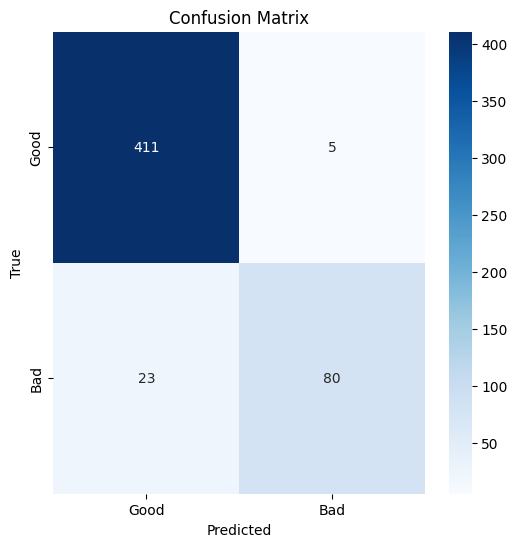

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       416
         1.0       0.94      0.78      0.85       103

    accuracy                           0.95       519
   macro avg       0.94      0.88      0.91       519
weighted avg       0.95      0.95      0.94       519



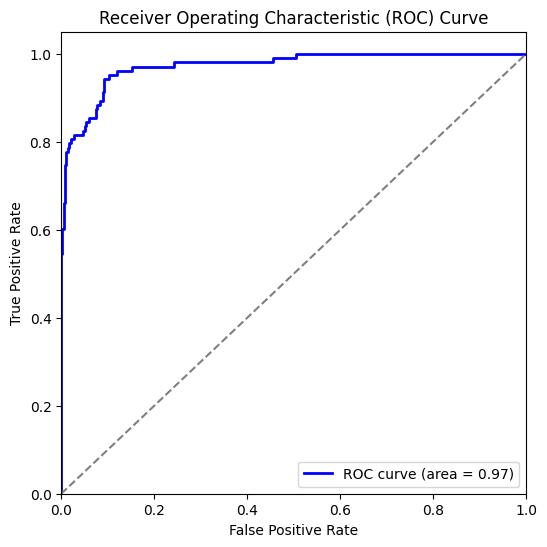

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

# Step 1: Make predictions on the test set
y_pred_prob = model.predict(X_test)  # Predict probability of class
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary class predictions (0 or 1)

# Step 2: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Good", "Bad"], yticklabels=["Good", "Bad"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 3: Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Step 4: ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


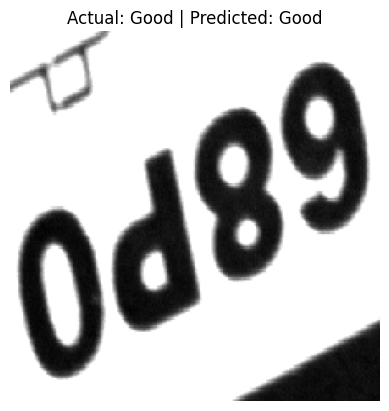

Predicted Probability (Bad): 0.0651


In [20]:
#Randomly pick an image and predict for good and bad image

import numpy as np
import matplotlib.pyplot as plt

# Select a random index from the test set
test_index = np.random.randint(0, len(X_test))

# Extract the test image and its actual label
test_image = X_test[test_index]
actual_label = "Bad" if y_test[test_index] == 1 else "Good"

# Add a batch dimension (required for model prediction)
test_image_batch = np.expand_dims(test_image, axis=0)

# Make the prediction
predicted_prob = model.predict(test_image_batch)
predicted_label = "Bad" if predicted_prob[0][0] > 0.5 else "Good"

# Reverse preprocessing for display
test_image_display = (test_image - test_image.min()) / (test_image.max() - test_image.min())  # Normalize between 0 and 1

# Display the image with prediction and actual label
plt.imshow(test_image_display)
plt.title(f"Actual: {actual_label} | Predicted: {predicted_label}")
plt.axis('off')
plt.show()

# Print the predicted probability
print(f"Predicted Probability (Bad): {predicted_prob[0][0]:.4f}")

# Detection Workflow

### Step 1: Setup Environment and Libraries

In [21]:
pip install mrcnn

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install tensorflow==2.4.1 keras==2.4.3

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.4.1
Note: you may need to restart the kernel to use updated packages.


In [23]:
# Clone the compatible Mask R-CNN repository
!git clone https://github.com/akTwelve/Mask_RCNN.git
# Navigate to the Mask R-CNN directory and install it
%cd Mask_RCNN
!pip install .
# Install dependencies for Mask R-CNN
!pip install imgaug
!pip install opencv-python
!pip install matplotlib

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.
/kaggle/working/Mask_RCNN
Processing /kaggle/working/Mask_RCNN
  Preparing metadata (setup.py) ... done
  Created wheel for mask-rcnn: filename=mask_rcnn-2.1-py3-none-any.whl size=56910 sha256=4c93be437af9441ccf2c2b4900d1cfc984e75c8739b81ca42818ef34e90007f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-if3lzqfr/wheels/c7/3f/07/ee0645179925121e1f22cc02058e7dbe9691f8d1d2b93472f7
Successfully built mask-rcnn
  Attempting uninstall: mask-rcnn
    Found existing installation: mask-rcnn 2.1
    Uninstalling mask-rcnn-2.1:
      Successfully uninstalled mask-rcnn-2.1


In [24]:
# Verify TensorFlow and Mask R-CNN installation
import tensorflow as tf
from mrcnn import model as modellib

print("TensorFlow Version:", tf.__version__)
print("Mask R-CNN is ready to use!")

TensorFlow Version: 2.18.0
Mask R-CNN is ready to use!


In [25]:
# Install required libraries
!pip install opencv-python-headless matplotlib

import os
import numpy as np
import cv2
from mrcnn.config import Config
from mrcnn import model as modellib, utils
import matplotlib.pyplot as plt

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


### Step 2: Define the configuration for the Mask R-CNN model.

In [26]:
class ScratchConfig(Config):
    NAME = "scratch_detection"  # Name of the model
    NUM_CLASSES = 1 + 1         # Background + Scratch
    GPU_COUNT = 1               # Number of GPUs to use
    IMAGES_PER_GPU = 1          # Images per GPU
    DETECTION_MIN_CONFIDENCE = 0.5  # Confidence threshold
    STEPS_PER_EPOCH = 100       # Training steps per epoch
    IMAGE_MIN_DIM = 224         # Minimum dimension of images
    IMAGE_MAX_DIM = 224         # Maximum dimension of images

### Step 3: Create Dataset Class to handle images and masks

In [27]:
class ScratchDataset(utils.Dataset):
    def load_scratch(self, bad_dir, mask_dir):
        """
        Load bad images and their corresponding masks.
        """
        self.add_class("scratch_detection", 1, "scratch")  # Add scratch class

        # Add images
        bad_images = [f for f in os.listdir(bad_dir) if f.endswith('.png')]
        for idx, image_name in enumerate(bad_images):
            bad_image_path = os.path.join(bad_dir, image_name)
            mask_image_path = os.path.join(mask_dir, image_name)  # Assumes mask names match bad image names
            self.add_image("scratch_detection",
                           image_id=idx,
                           path=bad_image_path,
                           mask_path=mask_image_path)

    def load_mask(self, image_id):
        """
        Load masks for the given image ID.
        """
        info = self.image_info[image_id]
        mask_image = cv2.imread(info['mask_path'], cv2.IMREAD_GRAYSCALE)
        mask_image = cv2.resize(mask_image, (224, 224))  # Resize for consistency
        mask = np.expand_dims(mask_image, axis=-1)  # Add channel dimension
        mask = (mask > 128).astype(np.uint8)  # Binarize the mask
        class_ids = np.array([1])  # Scratch class ID
        return mask, class_ids

    def image_reference(self, image_id):
        """
        Return the path of the image.
        """
        return self.image_info[image_id]['path']

### Step 4: Load the dataset using the ScratchDataset class

In [28]:
# Directories for bad images and masks
bad_dir = "/kaggle/input/anomaly-detection/anomaly_detection_test_data/bad"
mask_dir = "/kaggle/input/anomaly-detection/anomaly_detection_test_data/masks"

# Initialize and prepare dataset
dataset = ScratchDataset()
dataset.load_scratch(bad_dir, mask_dir)
dataset.prepare()

# Verify dataset
print("Dataset loaded:")
print(f"Total images: {len(dataset.image_ids)}")

Dataset loaded:
Total images: 1023


### Step 5: Visualize one image and its mask for verification

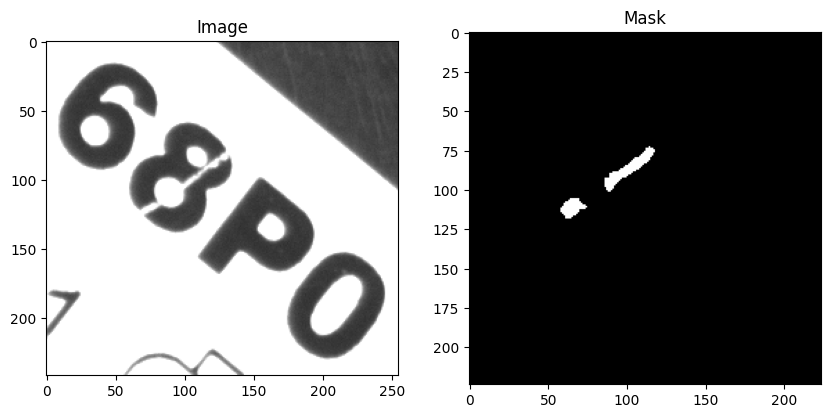

In [29]:
image_id = 10
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)

# Visualize
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Mask")
plt.imshow(mask[:, :, 0], cmap='gray')
plt.show()

### Implement the threshold part for classifying an image as "bad" based on the size of the scratch


* list all the image files in both the "bad" image folder and the "mask"
* image folderMatch bad images with corresponding masks
* Load a bad image and its corresponding mask


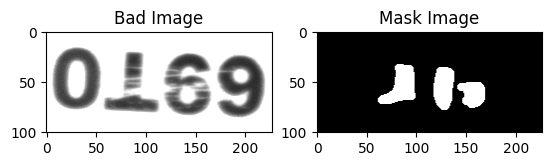

In [30]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define paths to the bad images and mask images directories
bad_image_dir = '/kaggle/input/anomaly-detection/anomaly_detection_test_data/bad'
mask_image_dir = '/kaggle/input/anomaly-detection/anomaly_detection_test_data/masks'

# List all bad image filenames
bad_image_filenames = sorted([f for f in os.listdir(bad_image_dir) if f.endswith('.png')])

# List all mask image filenames (they should be the same as the bad image filenames)
mask_image_filenames = sorted([f for f in os.listdir(mask_image_dir) if f.endswith('.png')])

# Check that the filenames match
assert bad_image_filenames == mask_image_filenames, "Filenames do not match!"

# Example for loading the first bad image and corresponding mask
image_filename = bad_image_filenames[1]

# Paths to the bad image and mask
bad_image_path = os.path.join(bad_image_dir, image_filename)
mask_image_path = os.path.join(mask_image_dir, image_filename)

# Load the images
bad_image = cv2.imread(bad_image_path, cv2.IMREAD_COLOR)
mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

# Visualize the bad image and mask
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(bad_image, cv2.COLOR_BGR2RGB))
plt.title("Bad Image")

plt.subplot(1, 2, 2)
plt.imshow(mask_image, cmap='gray')
plt.title("Mask Image")

plt.show()

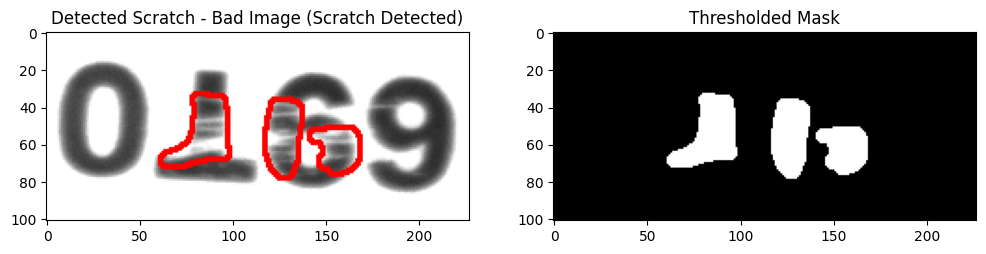

Bad Image (Scratch Detected)
Scratch Area: 2017.5 pixels


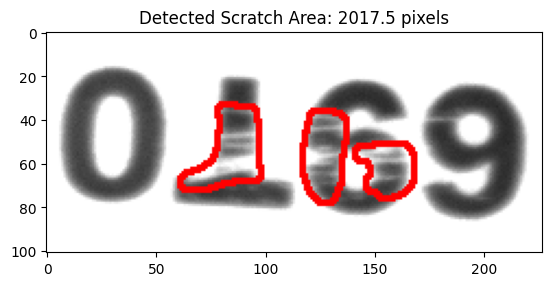

In [31]:
import cv2
import matplotlib.pyplot as plt

# Threshold the mask to identify the scratched regions
_, thresholded_mask = cv2.threshold(mask_image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the mask
contours, _ = cv2.findContours(thresholded_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate the scratch area
scratch_area = sum([cv2.contourArea(contour) for contour in contours])

# Define a threshold value for classification
threshold_value = 500  # Example threshold in pixels

# Classify the image as "bad" or "good" based on the scratch area
if scratch_area > threshold_value:
    classification = "Bad Image (Scratch Detected)"
    color = (0, 0, 255)  # Red for bad image
else:
    classification = "Good Image (No significant scratch)"
    color = (0, 255, 0)  # Green for good image

# Draw the contours on the original image
image_with_contours = bad_image.copy()
cv2.drawContours(image_with_contours, contours, -1, color, 2)

# Visualize the results
plt.figure(figsize=(12, 6))

# Show the original image with detected scratch
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Scratch - {classification}")

# Show the thresholded mask
plt.subplot(1, 2, 2)
plt.imshow(thresholded_mask, cmap='gray')
plt.title("Thresholded Mask")

plt.show()

# Print the classification result
print(classification)

print(f"Scratch Area: {scratch_area} pixels")
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Scratch Area: {scratch_area} pixels")
plt.show()

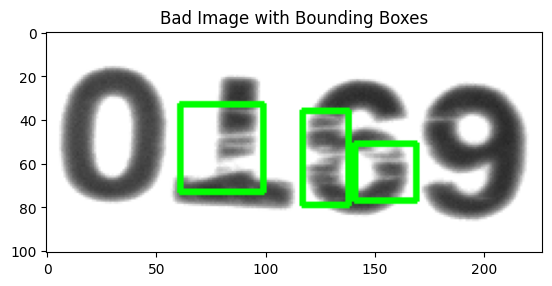

In [32]:
# Draw bounding boxes around the detected scratches
output_image = bad_image.copy()

for contour in contours:
    # Get the bounding box for each contour
    x, y, w, h = cv2.boundingRect(contour)

    # Draw a rectangle around the scratch
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Show the image with bounding boxes
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title("Bad Image with Bounding Boxes")
plt.show()